## 선형회귀분석

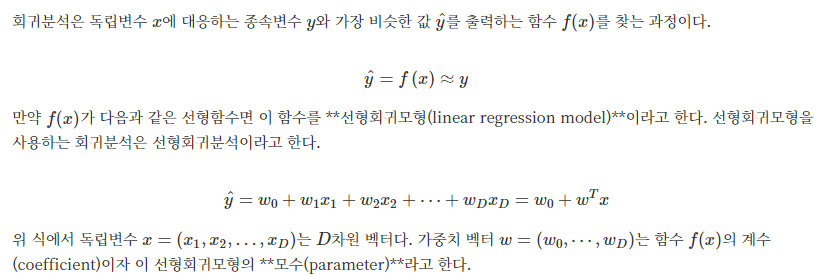

## 상수항 결합

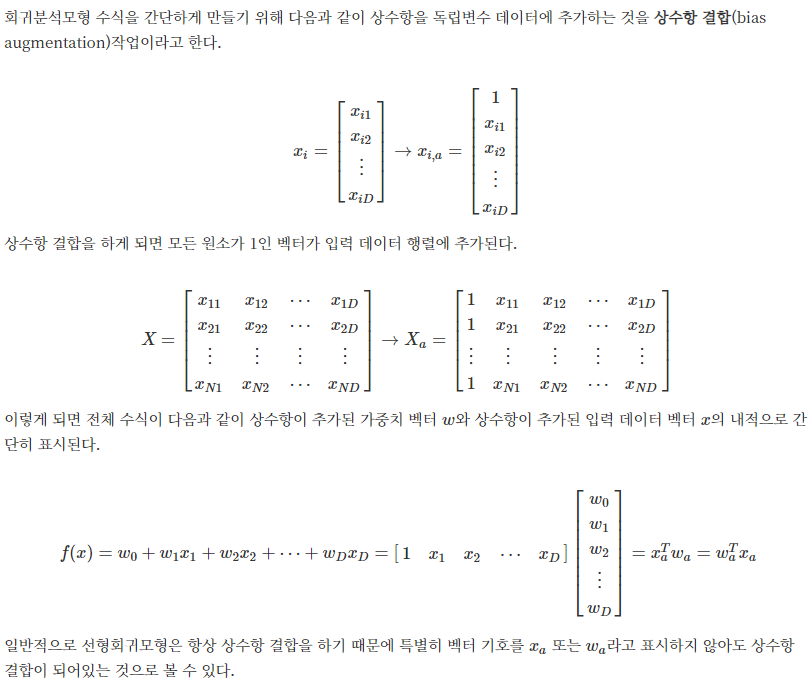

- 상수항 결합을 위한 add_constant 함수

In [2]:
import numpy as np
import pandas as pd

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
x0 = np.arange(10).reshape(5,2)
x0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [4]:
import statsmodels.api as sm

X= sm.add_constant(x0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

## 최소자승법

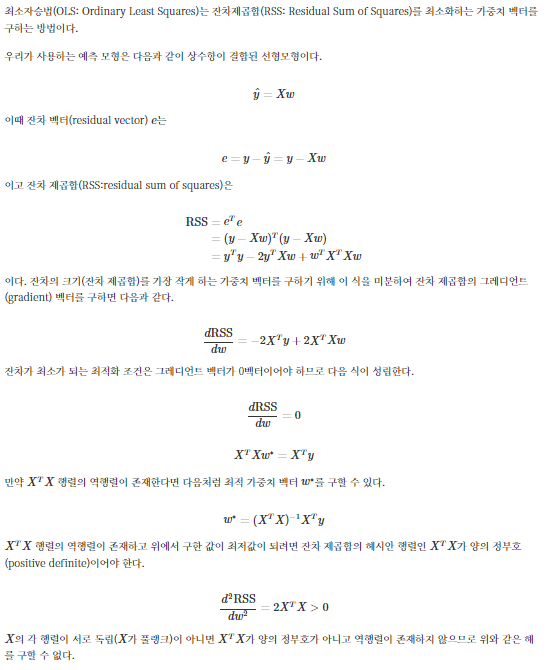

## 직교방정식

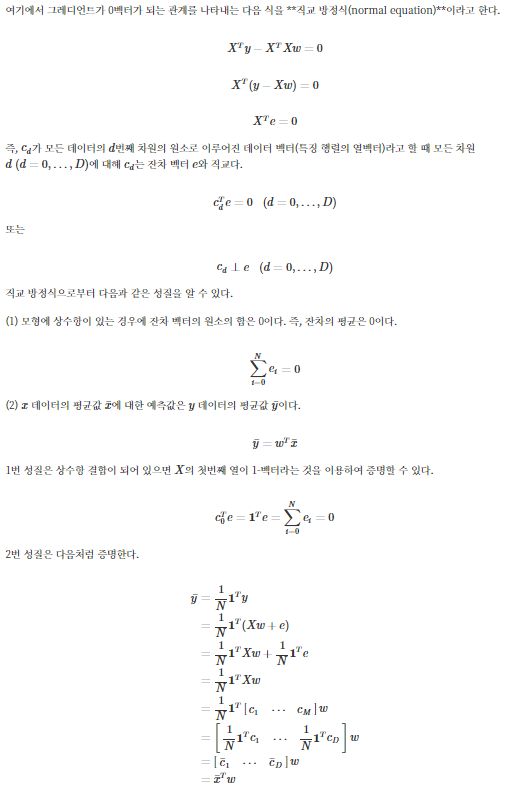

- Numpy 이용 선형회귀분석 (3에서 했던 make_regrssion)

In [5]:
from sklearn.datasets import make_regression

In [10]:
bias= 100
x0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, coef=True, random_state=1)

In [13]:
print(len(y))

200


In [14]:
X= sm.add_constant(x0)
y = y.reshape(len(y),1)

우리가 준 bias값은 100이었으며, w(parameter, 모수값)은

In [15]:
w

array(86.44794301)

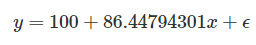

#### `OLS 해를 직접 이용하는 방법`

In [27]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [16]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[100.        ],
       [ 86.44794301]])

In [40]:
x_new = np.linspace(np.min(x0), np.max(x0), 10)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

In [41]:
x_new[:5]

array([-2.43483776, -1.88337516, -1.33191255, -0.78044994, -0.22898733])

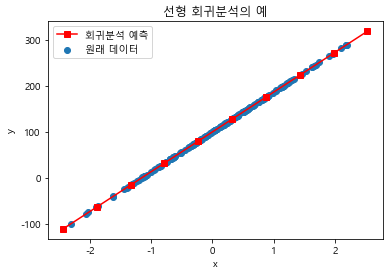

In [28]:
plt.scatter(x0, y, label='원래 데이터')
plt.plot(x_new, y_new, 'rs-', label='회귀분석 예측')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

#### `scikit-learn 패키지`

In [32]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression().fit(x0,y)

In [45]:
print(model.intercept_, model.coef_)

[100.] [[86.44794301]]


In [46]:
model.predict([[-2],[0], [1], [2]])

array([[-72.89588601],
       [100.        ],
       [186.44794301],
       [272.89588601]])

#### `statsmodels 패키지`
-  OLS 클래스를 사용하여 선형 회귀분석을 실시

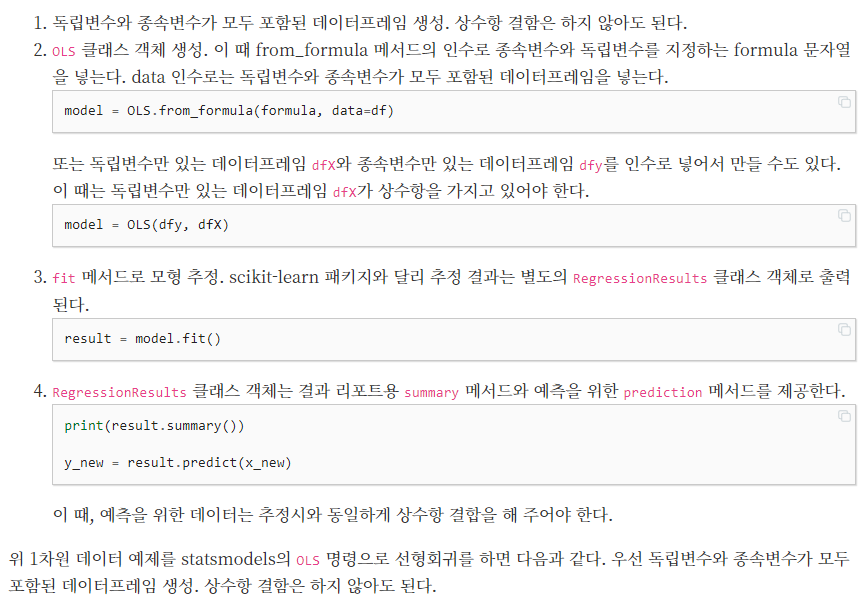

In [51]:
import statsmodels.api as sm

In [52]:
df = pd.DataFrame({"x": x0[:,0], 'y':y[:,0]})
df

,x,y
0,1.331457,215.101729
1,0.213534,118.459567
2,-0.075572,93.466981
3,0.315159,127.244881
4,-0.611756,47.114916
...,...,...
195,-0.267888,76.841627
196,-0.620001,46.402202
197,-0.528172,54.340638
198,1.224508,205.856172


In [55]:
dfX = sm.add_constant(df[['x']])
dfy = df[['y']]

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
model = sm.OLS(dfy, dfX)
result = model.fit()

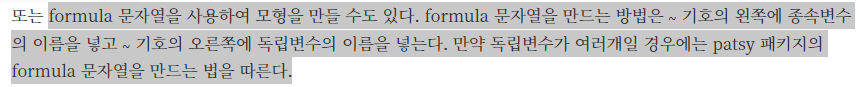

In [57]:
model = sm.OLS.from_formula('y~x', data=df)
result = model.fit()

In [58]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.282e+32
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:13:07   Log-Likelihood:                 5801.4
No. Observations:                 200   AIC:                        -1.160e+04
Df Residuals:                     198   BIC:                        -1.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.0000   4.37e-15   2.29e+16      0.0

In [59]:
result.predict({'x':[-2, -1, 0, 1, 2]})

0    -72.895886
1     13.552057
2    100.000000
3    186.447943
4    272.895886
dtype: float64

In [60]:
result.params

Intercept    100.000000
x             86.447943
dtype: float64

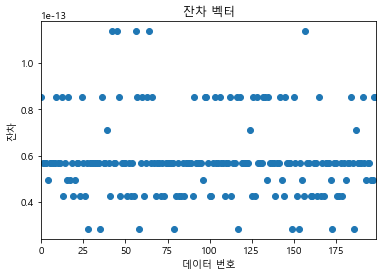

In [61]:
result.resid.plot(style='o')
plt.title('잔차 벡터')
plt.xlabel('데이터 번호')
plt.ylabel('잔차')
plt.show()

In [64]:
result.resid.sum() # 잔차의 합은 거의 0

1.1745271422114456e-11

In [65]:
result.predict({'x':x0.mean()})

0    109.223029
dtype: float64

In [66]:
y.mean()

109.22302858529552

### 보스턴 집값 예측 ㅋ 

In [67]:
from sklearn.datasets import load_boston

In [68]:
boston = load_boston()

In [70]:
dfX0 = pd.DataFrame(boston['data'], columns=boston['feature_names'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston['target'], columns=['MEDV'])


In [73]:
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        15:18:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

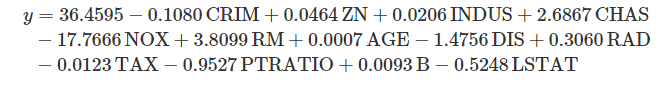

### 스케일링 조건수

In [76]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [77]:
model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        15:21:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

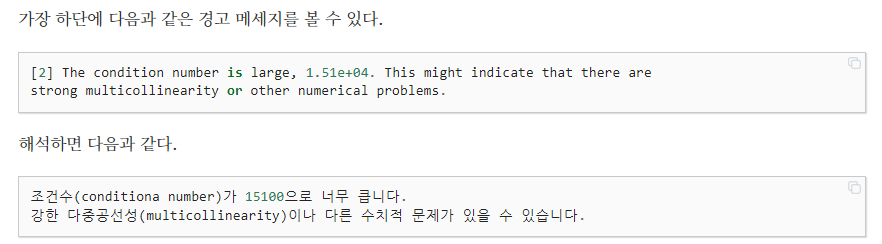

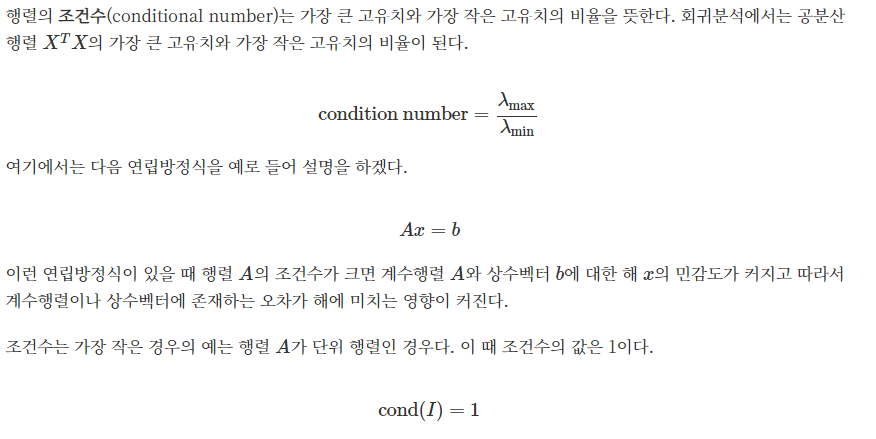

- 회귀분석에서 조건수가 커지는 경우 
1. 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우, 이 경우 스케일링(scaling)으로 해결
2. 다중 공선성. 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우 변수 선택이나 PCA를 사용한 차원축소로 해결

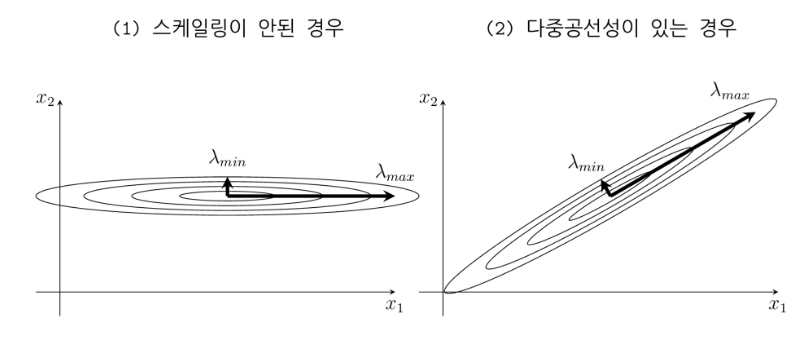

In [93]:
dfX.describe().loc['std']

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

-> 독립변수들이 0.1 수준 부터 100수준까지 제각각 크기를 가지고 있음

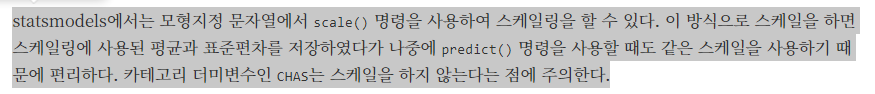

- 독립변수가 스케일링 안되면 조건수가 커져서 예측 오차가 증폭될 가능성이 커짐
- 이 효과를 확실하게 보기 위하여 일부러 다음처럼 TAX 변수를 크게 만들어 조건수를 아래와 같이 증폭 시킴

In [96]:
dfX2 = dfX.copy()
dfX2["TAX"] *= 1e13
df2 = pd.concat([dfX2, dfy], axis=1)

model2 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.42
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           8.42e-44
Time:                        15:49:19   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.554      0.0

### `Cond. No.                     1.19e+17`

In [94]:
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = ['scale({})'.format(name) for name in feature_names] + ['CHAS']
print(feature_names)

['scale(CRIM)', 'scale(ZN)', 'scale(INDUS)', 'scale(NOX)', 'scale(RM)', 'scale(AGE)', 'scale(DIS)', 'scale(RAD)', 'scale(TAX)', 'scale(PTRATIO)', 'scale(B)', 'scale(LSTAT)', 'CHAS']


In [97]:
model3 = sm.OLS.from_formula('MEDV ~' + '+'.join(feature_names), data=df2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        15:49:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

- 스케일링만으로 조건수가 10.6이 된 것을 확인할 수 있다.